# Query 6.1

Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from matplotlib.lines import Line2D

%matplotlib inline



In [2]:
# importing multiple file in at once:

import glob


#Choosing first 10 stocks of each cap
large_cap = glob.glob("Large_Cap/*.csv")
large_cap = large_cap[:10]

medium_cap = glob.glob("Mid_Cap/*.csv")
medium_cap = medium_cap[:10]
small_cap = glob.glob("Small_Cap/*csv")
small_cap = small_cap[:10]
my_list_of_lists = [large_cap, medium_cap, small_cap
                   ]
#Storing all filenames to one list
final_list = large_cap
final_list.extend(medium_cap)
final_list.extend(small_cap)


In [3]:
list_of_dfs = [pd.read_csv(filename) for filename in final_list]

In [4]:
for dataframe, filename in zip(list_of_dfs, final_list):
    dataframe['filename'] = filename

In [6]:
trial = []
def index():

    for data_frame in list_of_dfs:
        
        data_frame['Date'] = pd.to_datetime(data_frame['Date'], format = '%d-%b-%Y')
        data_frame.index = data_frame['Date']
        data_frame = data_frame[~data_frame.index.duplicated()]
        #Storing updated dataframes in a new list
        trial.append(data_frame)
        
index()

In [7]:
np.shape(trial[7])

(494, 16)

In [8]:
dfs = [df.set_index('Date') for df in list_of_dfs]
df = (pd.concat([*trial], axis = 1))

In [9]:
#Generating column name list

import os.path    

names = [os.path.split(p)[1] for p in final_list]
names = [name.replace('.csv', '') for name in names]
names

['TITAN',
 'MARUTI',
 'ASIANPAINT',
 'IOC',
 'DRREDDY',
 'TCS',
 'SUNPHARMA',
 'HDFC',
 'AXISBANK',
 'EICHERMOT',
 'RELINFRA',
 'GMRINFRA',
 'IGL',
 'MRPL',
 'AJANTPHARM',
 'GODREJIND',
 'ADANIPOWER',
 'CUMMINSIND',
 'SUNTV',
 'TATACHEM',
 'MINDAIND',
 'ASHOKA',
 'LUXIND',
 'NCC',
 'LALPATHLAB',
 'GUJALKALI',
 'BAJAJELEC',
 'CENTURYPLY',
 'PVR',
 'RCOM']

In [10]:
df = df['Close Price']
df.columns = [name for name in names]

Final DF with 30 stocks and their close prices, indexed with date

In [11]:
df


,TITAN,MARUTI,ASIANPAINT,IOC,DRREDDY,TCS,SUNPHARMA,HDFC,AXISBANK,EICHERMOT,...,MINDAIND,ASHOKA,LUXIND,NCC,LALPATHLAB,GUJALKALI,BAJAJELEC,CENTURYPLY,PVR,RCOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,483.65,6823.90,1148.05,442.10,2675.80,2365.10,654.45,1559.50,500.10,28930.60,...,517.90,216.05,819.60,97.35,900.60,457.35,341.15,266.65,1524.95,32.00
2017-05-16,488.30,6953.95,1142.85,446.60,2724.10,2429.15,652.35,1566.55,501.50,29362.50,...,545.60,214.90,817.50,100.40,910.95,455.25,347.00,266.10,1539.00,32.10
2017-05-17,481.75,6958.20,1154.95,444.25,2736.90,2455.35,650.90,1552.50,502.80,29093.55,...,560.10,217.00,819.80,101.45,911.70,472.65,349.85,264.85,1530.30,31.95
2017-05-18,471.65,6831.05,1151.35,439.90,2678.95,2536.20,653.95,1537.05,492.00,28357.30,...,545.25,209.65,820.05,97.00,909.75,461.85,334.10,260.35,1515.05,31.05
2017-05-19,471.15,6790.55,1123.15,435.40,2656.45,2507.15,653.15,1520.60,501.70,27936.05,...,560.80,206.25,817.80,95.45,910.25,455.35,336.20,254.05,1513.55,30.55
2017-05-22,481.40,6701.70,1112.55,425.35,2608.70,2531.35,640.15,1519.85,502.30,27189.90,...,564.05,201.60,817.05,95.25,909.85,455.25,313.25,255.50,1481.00,29.80
2017-05-23,478.35,6878.85,1098.90,424.25,2579.45,2521.70,614.10,1511.50,500.60,27598.25,...,552.90,197.65,807.30,90.95,886.90,435.15,315.55,247.95,1496.45,28.00
2017-05-24,469.20,6869.65,1091.20,430.55,2516.80,2559.15,603.50,1524.85,499.30,27364.70,...,555.55,196.00,792.00,83.25,894.70,440.50,327.95,241.05,1450.00,25.90
2017-05-25,463.90,6985.70,1113.20,438.95,2427.70,2624.60,591.55,1539.75,507.45,28009.45,...,568.90,199.55,807.30,85.85,898.25,443.15,346.20,252.65,1461.15,25.95


# Query 6.2


Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [12]:
returns = df.pct_change().mean() *252 
#For one trading year Annual Average Percentage Return
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
#Volatility: 
returns['Volatility'] = df.pct_change().std() * np.sqrt(252)

In [13]:
returns

,Returns,Volatility
TITAN,0.491600,0.324858
MARUTI,0.004006,0.225763
ASIANPAINT,0.097900,0.209028
IOC,-0.413993,0.499441
DRREDDY,0.068001,0.298175
TCS,0.075968,0.433781
SUNPHARMA,-0.192882,0.348501
HDFC,0.137911,0.214401
AXISBANK,0.233181,0.277870
EICHERMOT,-0.176561,0.299928


# Query 6.3

Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

In [14]:
#Formatting the data as a numpy aaray to feed into the Kmeans Algorithm

data = np.asarray([np.asarray(returns['Returns']),
                   np.asarray(returns['Volatility'])]).T
#Transpose to change the axis


In [15]:
from sklearn.cluster import KMeans

Text(0.5,1,'Elbow Curve')

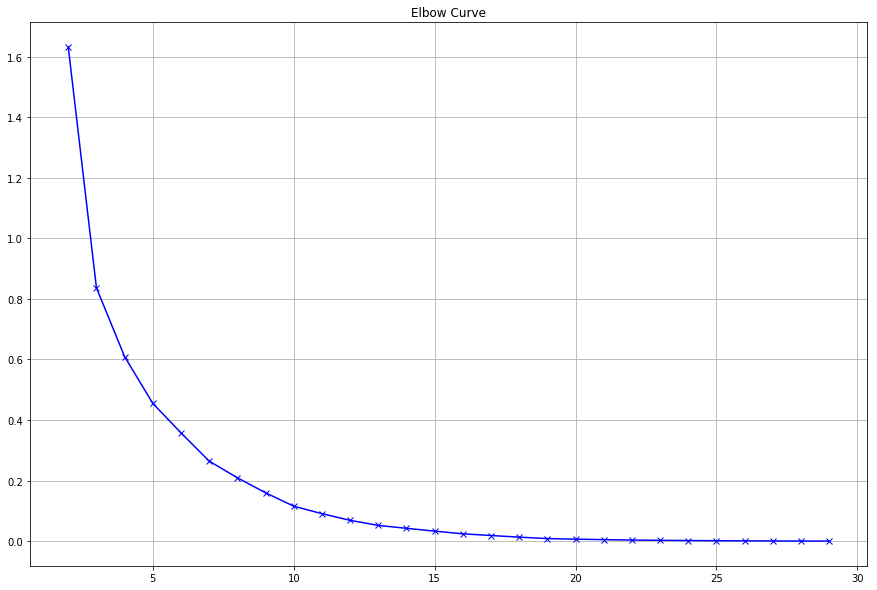

In [16]:
X= data
distortions = []
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.grid()
plt.title("Elbow Curve")

We can infer from the graph that when the number of clusters reaches 8 on the bottom axis, the reduction in SSE begins to slow down for each increase in cluster number. 

This leads to the conclusion that the optimal number of clusters would lie around the 8 mark

In [17]:
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show

In [18]:
#Computing K means with K = 8, thus, taking it as 8 clusters
centroids, _ = kmeans(data, 8)

#assigning each sample to a cluster
#Vector Quantisation:

idx, _ = vq(data, centroids)

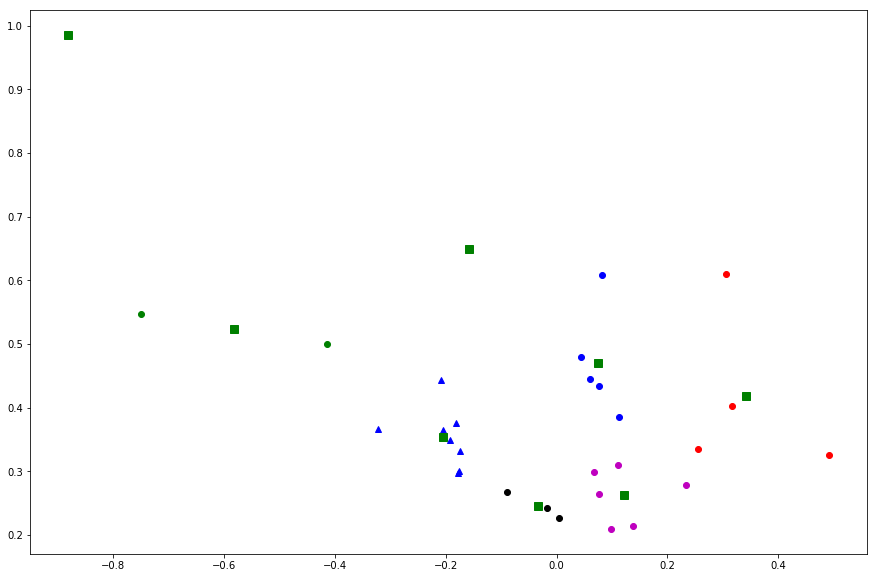

In [19]:
# some plotting using numpy's logical indexing
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'ob',#blue circles
     data[idx==1,0],data[idx==1,1],'oy',#yellow circles
     data[idx==2,0],data[idx==2,1],'or', #red circles
     data[idx==3,0],data[idx==3,1],'og', #green circles
     data[idx==4,0],data[idx==4,1],'om',#magenta circles
     data[idx==5,0],data[idx ==5,1], 'oc',#cyan circles,
     data[idx==6,0],data[idx ==6,1], 'ok', #black cicrles 
     data[idx==7,0],data[idx ==7,1], '^b', #blue triangle
     
        
        
        
        
        )
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8, )

plt.show()

In [20]:
print(returns.idxmax())

#Finding outlier stocks

Returns       TITAN
Volatility     RCOM
dtype: object


In [21]:
#Finding which clusters stocks are in:

details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
for detail in details:
    print(detail)

('TITAN', 2)
('MARUTI', 6)
('ASIANPAINT', 4)
('IOC', 3)
('DRREDDY', 4)
('TCS', 0)
('SUNPHARMA', 7)
('HDFC', 4)
('AXISBANK', 4)
('EICHERMOT', 7)
('RELINFRA', 3)
('GMRINFRA', 0)
('IGL', 1)
('MRPL', 7)
('AJANTPHARM', 7)
('GODREJIND', 6)
('ADANIPOWER', 2)
('CUMMINSIND', 7)
('SUNTV', 7)
('TATACHEM', 6)
('MINDAIND', 0)
('ASHOKA', 7)
('LUXIND', 2)
('NCC', 0)
('LALPATHLAB', 4)
('GUJALKALI', 0)
('BAJAJELEC', 2)
('CENTURYPLY', 7)
('PVR', 4)
('RCOM', 5)


# Query 6.4

Prepare a separate Data frame to show which stocks belong to the same cluster 

In [22]:
symbols = [element[0] for element in details]
cluster = [element[1] for element in details]

In [23]:
cluster_df = pd.DataFrame(list(zip(symbols, cluster)), columns=['Symbol', 'Cluster'])

cluster_df

,Symbol,Cluster
0,TITAN,2
1,MARUTI,6
2,ASIANPAINT,4
3,IOC,3
4,DRREDDY,4
5,TCS,0
6,SUNPHARMA,7
7,HDFC,4
8,AXISBANK,4
9,EICHERMOT,7


In [24]:
label_color_map = {0:'r', 1:'b', 2:'y', 3:'g', 4:'k', 5:'m', 6:'gray', 7:'orange'}

label_color = [label_color_map[l] for l in cluster_df.Cluster]



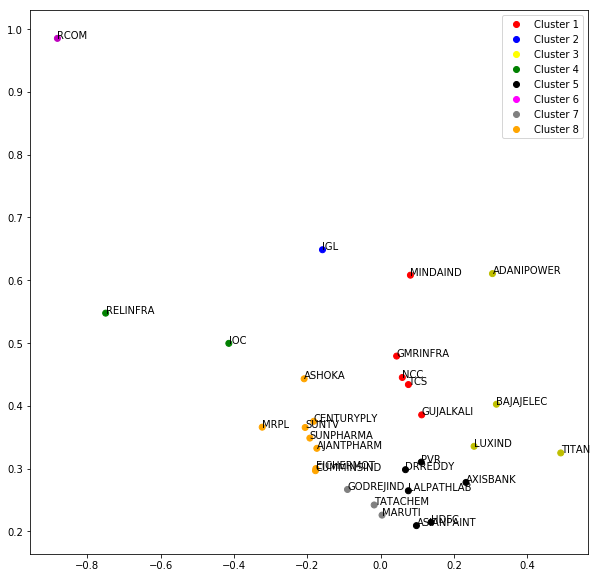

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(returns.Returns, returns.Volatility, c = label_color)
for i, txt in enumerate(returns.index):
    ax.annotate(txt, (returns.Returns[i], returns.Volatility[i]))

circle1 = Line2D(range(1), range(1), color = 'red', linewidth = 0, marker= 'o', markerfacecolor='red')
circle2 = Line2D(range(1), range(1), color = 'blue', linewidth = 0,marker= 'o', markerfacecolor='blue')
circle3 = Line2D(range(1), range(1), color = 'yellow',linewidth=0,  marker= 'o', markerfacecolor='yellow')
circle4 = Line2D(range(1), range(1), color = 'green', linewidth=0,marker= 'o', markerfacecolor='green')
circle5 = Line2D(range(1), range(1), color = 'black', linewidth = 0,marker= 'o', markerfacecolor='black')
circle6 = Line2D(range(1), range(1), color = 'magenta', linewidth=0,marker= 'o', markerfacecolor='magenta')
circle7 = Line2D(range(1), range(1), color = 'gray',linewidth=0,  marker= 'o', markerfacecolor='gray')
circle8 = Line2D(range(1), range(1), color = 'orange',linewidth=0, marker= 'o', markerfacecolor='orange')


plt.legend((circle1, circle2, circle3, circle4, circle5, circle6, circle7, circle8)
           , ('Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6',
             'Cluster 7', 'Cluster 8'), numpoints = 1, loc = 1)
plt.show()

    